In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import scipy.signal as sp
import datetime as dt
from beam2ENU import beam2ENU
import seawater as sw
import oceans as oc
from scipy.interpolate import griddata
from ocean_tools import TKED


In [125]:
directory = '../../Data/deployment_raw/';
outdir = '../../plots/ctd/thorpe/';
deployment_name = 'deploy1_';
measurement_type = 'ctd_';
file_type = 'raw_'
i = 0
c_file = 'C'+("%07d" % (i,))
c_data = pd.read_pickle(directory+deployment_name+file_type+c_file)

In [126]:
def buoyancy_freq(data):
    #Get buoyancy frequency
    dp = np.diff(data['c_pres'].values,axis=0)
    data['dp'] = np.append(dp,dp[-1])
    data['dp'] = data['dp'].mask(((data['dp']-data['dp'].mean()).abs() > data['dp'].std()))
    data['dp'] = data['dp'].interpolate().rolling(5).mean()
    CT = gsw.CT_from_t(data['c_sal'],data['c_temp'],data['c_pres'])
    SA = gsw.SA_from_SP(data['c_sal'],data['c_pres'],174,-43)
    pdens = gsw.sigma0(SA, CT)
    data['pdens'] = pdens
    dpdens = np.diff(data['pdens'].values,axis=0)
    data['dpdens'] = np.append(dpdens,dpdens[-1])
    data['dpdens'] = data['dpdens'].mask(((data['dpdens']-data['dpdens'].mean()).abs() > data['dpdens'].std()))
    data['dpdens'] = data['dpdens'].interpolate().rolling(5).mean()    
    data['N2'] = (-9.7963*data['dpdens'])/(data['pdens']*data['dp'])

    
    
    #filter buoyancy frequency by removing outliers
    #data['N2'] = data['N2'].mask(data['N2']< 0.000005)
    data['N2'] = data["N2"].replace([np.inf, -np.inf], np.nan)
    data['N2'] = data['N2'].mask(((data['N2']-data['N2'].mean()).abs() > data['N2'].std()))
    data['N2'] = data['N2'].interpolate().rolling(10).mean()
    #data['N2'] = data['N2'].mask(((data['N2']-data['N2'].mean()).abs() > 3*data['N2'].std()))
    #data['N2'] = data['N2'].interpolate()
    
    #Sorted
    data['pdens_sort'] = np.sort(pdens)
    dpdens_sort = np.diff(data['pdens_sort'].values,axis=0)
    data['dpdens_sort'] = np.append(dpdens_sort,dpdens_sort[-1])
    data['dpdens_sort'] = data['dpdens_sort'].mask(((data['dpdens_sort']-data['dpdens_sort'].mean()).abs() > data['dpdens_sort'].std()))
    data['dpdens_sort'] = data['dpdens_sort'].interpolate().rolling(5).mean()    
    data['N2_sort'] = (-9.7963*data['dpdens_sort'])/(data['pdens_sort']*data['dp'])    
    
    return data

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6     -0.004366
7     -0.003259
8     -0.002104
9     -0.001428
10    -0.000878
11    -0.002574
12    -0.001897
13    -0.001804
14    -0.001896
15    -0.001538
16    -0.000834
17    -0.000758
18    -0.000998
19    -0.000733
20    -0.000613
21    -0.000574
22    -0.000506
23    -0.000417
24    -0.000462
25    -0.000333
26    -0.000599
27    -0.000226
28    -0.000194
29    -0.000197
         ...   
884   -0.000254
885   -0.000385
886   -0.000232
887   -0.000293
888   -0.000529
889   -0.000555
890   -0.000779
891   -0.000420
892   -0.000194
893   -0.000124
894   -0.000088
895   -0.000049
896   -0.000043
897   -0.000059
898   -0.000162
899   -0.005699
900    0.000433
901    0.000618
902    0.000675
903    0.002222
904   -0.000864
905   -0.000439
906   -0.000881
907   -0.000395
908   -0.000403
909   -0.000655
910    0.001479
911   -0.000896
912   -0.000308
913   -0.000175
Name: N2_sort, Length: 9

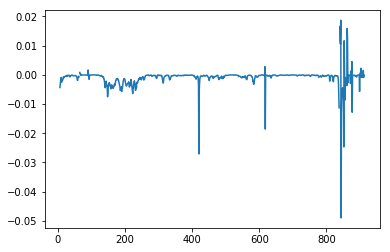

In [127]:
c_data = buoyancy_freq(c_data)
print(c_data['N2_sort'])
c_data['N2_sort'] = c_data["N2_sort"].replace([np.inf, -np.inf], np.nan)
c_data['N2_sort'] = c_data['N2_sort'].mask(((c_data['N2_sort']-c_data['N2_sort'].mean()).abs() > 3*c_data['N2_sort'].std()))
#c_data['N2_sort'] = c_data['N2_sort'].interpolate().rolling(10).mean()
plt.plot(c_data['N2_sort'])

In [128]:
[LT,Td,Nsqu,Lo,R,x_sorted,idxs] = TKED.thorpe_scales(c_data["c_depth"].values*-1,c_data['c_dens'].values,full_output=True)
c_data["Td"] = Td
c_data["Td"] = c_data["Td"].rolling(10).mean()
c_data["Td"] = c_data["Td"]**2
c_data["Td"] = c_data["Td"].rolling(10).mean()
c_data["LT"] = np.sqrt(c_data["Td"])

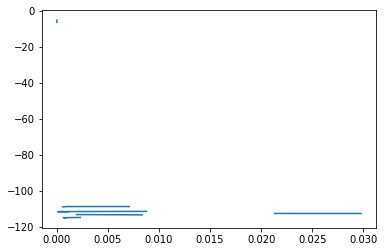

In [129]:
plt.plot((0.64*(c_data['LT']**2)*(c_data['N2_sort']**(3/2))),-c_data['c_pres'])

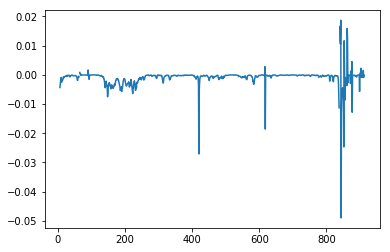

In [130]:
plt.plot(c_data['N2_sort'])
